In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('daily_community_center_attendance.csv')

<div style="text-align: center;">

<h3 style="text-align:center;">Daily Community Center Attendance </h3>

This dataset tracks daily attendance at Pittsburgh community centers over the past 15 years. The left panel is a time series of monthly average attendance across all centers. The right panel summarizes per-center attendance using the median (dot) and interquartile range (horizontal line) for centers with at least 30 records (n ≥ 30).

The time series shows a clear dip during COVID-19. Attendance rises after lockdowns, but the average level remains below the pre-COVID baseline. Further time-series analysis (e.g., tests for stationarity, trend, seasonality, and autocorrelation) could quantify these patterns.

The right-hand summary highlights which centers have higher typical attendance (larger medians) and more variability (wider IQRs). Comparing the two views—for example, relating center-level medians to their contributions over time—could reveal how specific centers drive system-wide trends.



---

</div>

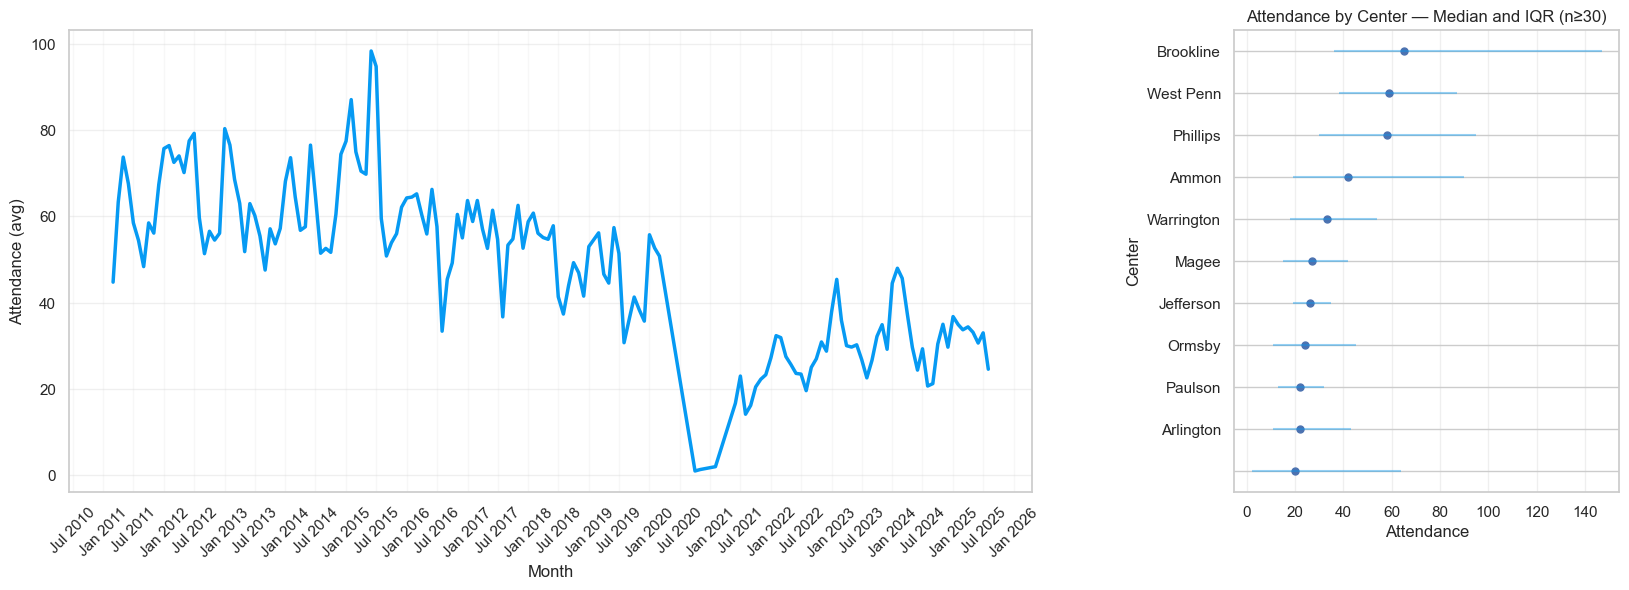

In [2]:
sns.set_theme(style="whitegrid")

df['center_name'] = df['center_name'].apply(lambda x: x[:-17])
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.sort_values("date")

df_m = (df.set_index("date")
          .resample("MS")["attendance_count"]
          .mean()
          .reset_index())

stats = (df.groupby("center_name")["attendance_count"]
           .agg(n="size",
                med="median",
                q1=lambda s: s.quantile(0.25),
                q3=lambda s: s.quantile(0.75))
           .query("n >= 30")
           .sort_values("med"))

fig, (ax1, ax2) = plt.subplots(
    ncols=2, figsize=(20, 6),
    gridspec_kw={"width_ratios": [2.5, 1], "wspace": 0.3}
)

sns.lineplot(data=df_m, x="date", y="attendance_count",
             ax=ax1, color="xkcd:azure", linewidth=2.5)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.set_xlabel("Month")
ax1.set_ylabel("Attendance (avg)")
ax1.grid(axis="y", which="major", alpha=0.3)
ax1.grid(axis="x", which="major", alpha=0.15)
ax1.tick_params(axis="x", rotation=45)

y = range(len(stats))
ax2.hlines(y, stats["q1"], stats["q3"], alpha=0.4, color="xkcd:azure")
ax2.scatter(stats["med"], y, s=25)
ax2.set(
    yticks=y, yticklabels=stats.index,
    xlabel="Attendance", ylabel="Center",
    title="Attendance by Center — Median and IQR (n≥30)"
)
ax2.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()